In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# 16 - Ordinary differential equations

#### Excercise 1
Copy the RK2 method from the lecture notebook and modify it to solve the same problem with the RK4 method.

# RK 2

$$\begin{array}{c}
\delta x_1 &=& \delta t \cdot f(x(t),t) \\
\delta x_2 &=& \delta t \cdot f(x(t)+\frac{1}{2}\delta x_1,t+\frac{1}{2}\delta t) \\
x(t+\delta t) &=& x(t) + \delta x_2
\end{array}$$

# RK 4

$$\begin{array}{c}
\delta x_1 &=& \delta t \cdot f(x(t),t) \\
\delta x_2 &=& \delta t \cdot f(x(t)+\frac{1}{2}\delta x_1,t+\frac{1}{2}\delta t) \\
\delta x_3 &=& \delta t \cdot f(x(t)+\frac{1}{2}\delta x_2,t+\frac{1}{2}\delta t) \\
\delta x_4 &=& \delta t \cdot f(x(t)+\delta x_3,t+\delta t) \\
x(t+\delta t) &=& x(t) + \frac{1}{6}\left(\delta x_1+2\delta x_2+2\delta x_3 +\delta x_4\right)
\end{array}$$

<font color="blue">**Answer:**</font>


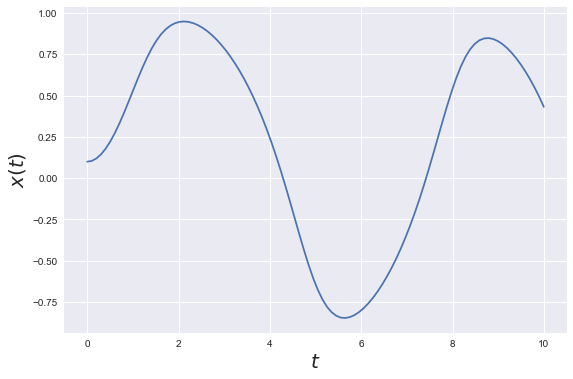

In [2]:
# 4th order RK

# x' = -x^3 + sin(t)
def f(x, t):
    return -x**3+np.sin(t)


t0 = 0.0
t1 = 10.0
N = 100
x0 = 0.1

tpoints, dt = np.linspace(t0, t1, N, retstep=True)
xpoints = []

x = x0
for t in tpoints:
    xpoints.append(x)
    x1 = dt * f(x, t)
    x2 = dt * f(x + x1/2, t + dt/2)
    x3 = dt * f(x + x2/2, t + dt/2)
    x4 = dt * f(x + x3, t + dt)
    x += (1/6) * (x1 + 2*x2 + 2*x3 + x4)

plt.figure(figsize=(9, 6))
plt.plot(tpoints, xpoints)
plt.xlabel(r"$t$", fontsize=20)
plt.ylabel(r"$x(t)$", fontsize=20)
plt.show()
plt.close()


#### Excercise 2

Consider this simple circuit 

<img width=512 src="./lowpass.png"/>

This circuit acts as a low-pass filter for $V_{in}$. 

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through~$R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:
$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \dot{Q}.
$$
Substituting the second equation into the third, then substituting the result into the first equation, we find that 
$$
\dot{V}_\textrm{out} = \frac{1}{RC}\left( V_\textrm{in} - V_\textrm{out} \right).
$$

<font color="orange">Use `scipy.inetgrate.solve_ivp` to solve the equation for $V_\textrm{out}(t)$ from $t=1\rightarrow10$ sec, and $V_\textrm{out}(t_0)=0.1$ V. </font>
    
Let $V_\textrm{in}$ be alternating current signal with noise; 
$$V_\textrm{in}(t)=\cos(2\pi f_0t)+0.1\cos(2\pi f_1t)+0.15\cos(2\pi f_2t)$$
where $f_0=0.5$ Hz is the fundamental signal frequency, and frequencies $f_1=10.2$ Hz, and $f_2=21.3$ Hz represent high frequency noise.  Plot both $V_\textrm{in}(t)$ and $V_\textrm{out}(t)$ on top of each other to see the smoothing.

Choose $RC$ in seconds such that the cutoff frequency $1/RC$ removes most of the noise. Remember, $V_\textrm{out}(t)$ is delayed by the time $RC$, the time it takes to charge and discharge the capacitor.

<div class="alert alert-block alert-info">
<b>Tip:</b> If you pack the constants into tuples like this:

```python
RC = 0.15
f0 = 0.5
f1 = 10.2
f2 = 21.3
frequencies  = (f0,f1,f2) 
constants = (RC,frequencies)
```
The you can unpack them like this:

```python
def Vin(t,args) :
    f0,f1,f2 = args
    ...
    return Vin
def f(Vout,t,args):
    RC,frequencies = args[0]
    ...Vin(t,frequencies)...
```
</div>

<font color="blue">**Answer:**</font>


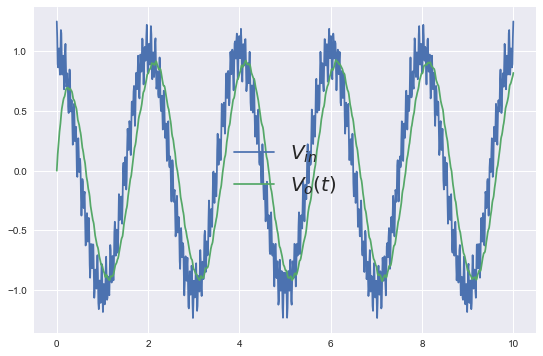

In [3]:
from scipy.integrate import solve_ivp

RC = 0.15
f0 = 0.5
f1 = 10.2
f2 = 21.3
frequencies = (f0, f1, f2)
constants = (RC, frequencies)

t0 = 0
t1 = 10
N = 1000
t = np.linspace(t0, t1, N)


def Vin(t, *freqs):
    f0, f1, f2 = freqs
    return (
        np.cos(2 * np.pi * f0 * t) +
        0.1 * np.cos(2 * np.pi * f1 * t) +
        0.15 * np.cos(2 * np.pi * f2 * t)
    )


def f(t, Vout, *args):
    RC, frequencies = args
    return (1 / RC) * (Vin(t, *frequencies) - Vout)


Vout = solve_ivp(f, (0, 10), (0,), args=constants, t_eval=t)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(t, Vin(t, *frequencies), label=r"$V_{in}$")
ax.plot(t, Vout.y[0], label=r"$V_o(t)$")
ax.legend(fontsize=20)
plt.show()
plt.close()


#### Excercise 3

#### <font color="orange">Solve either the Lotka-Volterra predator-prey equations, or the Kermack–McKendrick SIR infection equations.</font>

#### Lotka-Volterra equations
The [Lotka-Volterra equations][1] are a mathematical model of predator-prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the
prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x=2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes.  But 0.001 is a pretty close spacing of values, so it's a good approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
$$\dot{x} = \alpha x - \beta xy$$
where $\alpha$ and $\beta$ are constants.  At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits, because they need food to grow and reproduce, but also die of old age at a rate proportional to their own population:
$$\dot{y} = \gamma xy - \delta y$$
where $\gamma$ and $\delta$ are also constants.

<font color="orange">Solve these equations using `scipy.integrate.solve_ivp` for the case $\alpha=1$, $\beta=\gamma=0.5$, and  $\delta=2$, starting from the initial condition $x_0=y_0=2$.  Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  </font>

#### Kermack–McKendrick theory
The [Kermack–McKendrick theory][2] is a hypothesis that predicts the number and distribution of cases of an infectious disease as it is transmitted through a population over time. From the 1920s to the 1930s, these were the first [compartmental models][3] of infection spread, where the population is compartmentalized into the catagories of Susceptible, Infectious, or Recovered, hense the name SIR model.

$$\begin{array}{}
\dot{x} &=& -\beta xy\\
\dot{y} &=& \beta xy-\gamma y\\
\dot{z} &=& \gamma y
\end{array}$$
- Number of people still Susceptible : $x$
- Number of Infected people : $y$ 
- Number of people Recovered : $z$
- Infection rate : $\beta$
- Mean recovery rate : $\gamma$
- Epidemilogical constant : $\epsilon = \beta x /\gamma$
    - If $\epsilon > 1$, each person who gets the disease will infect more than one person, so the epidemic will spread.
    - If $\epsilon < 1$, each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will stop.
    - Time point where $\epsilon$ transitions from $>1$ to $<1$ is the day of peak number of infections.
    
<font color="orange">Solve these equations using `scipy.integrate.solve_ivp`. Show the case of a low infection rate such as $\beta=0.002$, and a fast recovery rate $\gamma=0.25$, a population of $x=1000$ and a single infected person $y=1$. Obviously, there are no recovered people at the start $z=0$. Model the infection over 20 days; from $t=0$ to $t=20$.  

Plot the cuves of the susceptiple, infected, and recovered populations. 
    
In a seperate plot, plot the epidemilogical constant $\epsilon$ as it evolves in time.
</font>

    
[1]:https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations
[2]:https://en.wikipedia.org/wiki/Kermack%E2%80%93McKendrick_theory
[3]:https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

<b>Tip:</b> Notice that the differential equations in this case do not depend explicitly on time $t$ - in vector notation, the right-hand side of each equation is a function $f(\mathbf{r})$ with no $t$ dependence.  You may still find it convenient to define  a Python function <tt>f(t,r)</tt> including the time variable, so that your  program takes the same form as programs given earlier.  You don't have to do it that way, but it can avoid some confusion.

<font color="blue">**Answer:**</font>


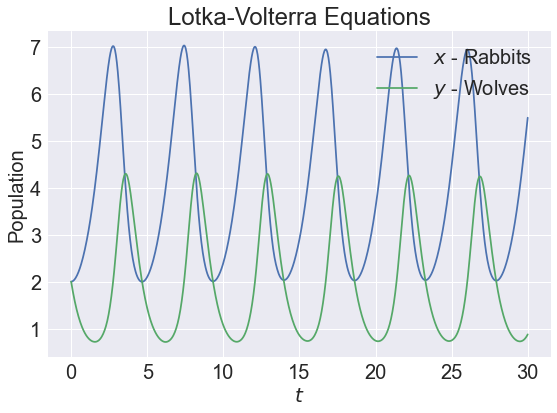

In [4]:
t0 = 0
t1 = 30
N = 1000
t = np.linspace(t0, t1, N)

a, b, g, d = 1, 0.5, 0.5, 2
x0 = y0 = 2


def xdot(x, y, *args):
    a, b, g, d = args
    return a * x - b * x * y


def ydot(x, y, *args):
    a, b, g, d = args
    return g * x * y - d * y


def f(t, r, *args):
    x, y = r
    return np.array(
        [
            xdot(x, y, *args), ydot(x, y, *args)
        ]
    )


solution = solve_ivp(
    fun=f,
    t_span=(t0, t1),
    y0=(x0, y0),
    t_eval=t,
    args=(a, b, g, d)
)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title("Lotka-Volterra Equations", fontsize=24)
ax.plot(t, solution.y[0], label=r"$x$ - Rabbits")
ax.plot(t, solution.y[1], label=r"$y$ - Wolves")
ax.tick_params(labelsize=20)
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"Population", fontsize=20)
ax.legend(fontsize=20)
plt.show()
plt.close()


#### Excercise 4

One of the most celebrated sets of differential equations in physics is the <a href="https://en.wikipedia.org/wiki/Lorenz_system">Lorenz equations</a>:
$$\dot{x} = \sigma(y-x),\qquad \dot{y} = \rho x - y - xz,\qquad\dot{z} = xy - \beta z,$$
where $\sigma$, $\rho$, and $\beta$ are constants.  

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns.  The reason for their fame is that they were one of the first incontrovertible examples of *deterministic chaos*, the occurrence of apparently random motion even though there is no randomness built into the equations. We encountered a different example of chaos in the logistic map earlier.

<font color="orange">Write a program to solve the Lorenz equations for the case $\sigma=10$, $\rho=28$, and $\beta=8/3$ in the range from $t=0$ to $t=50$ with initial conditions $(x,y,z)=(0,1,0)$.  </font>

   * DO NOT COPY THE CODE FROM THE WIKIPEDIA PAGE. You must use `scipy.integrate.solve_ivp` instead,and really. It is a small change to the program for the Lotka-Volterra equations.
   
   * Print the message from `scipy.integrate.solve_ivp` to make sure that there were no errors.

   * Have your program make a plot of $y$ as a function of time.  Note the unpredictable nature of the motion.  
   
   * Add to your program to produce a plot of $z$ against $x$.  You should see a picture of the famous *strange attractor* of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.
   
   
<p><a href="https://commons.wikimedia.org/wiki/File:A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif#/media/File:A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif" alt="A Trajectory Through Phase Space in a Lorenz Attractor.gif"></a><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Danbquinn&amp;action=edit&amp;redlink=1" class="new" title="User:Danbquinn (page does not exist)">Dan Quinn</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=29370723">Link</a></p>

<font color="blue">**Answer:**</font>


The solver successfully reached the end of the integration interval.


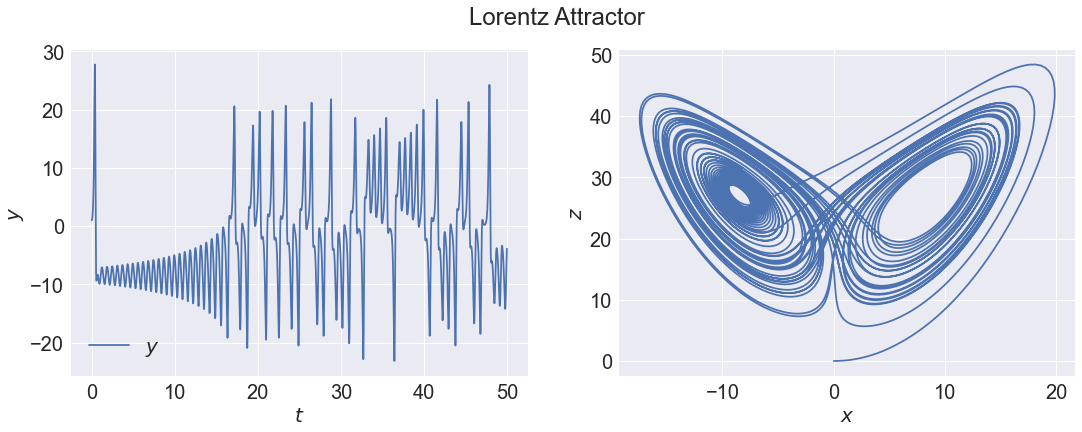

In [5]:
t0 = 0
t1 = 50
N = 10000
t = np.linspace(t0, t1, N)

sigma, rho, beta = 10, 28, 8/3
x0, y0, z0 = 0, 1, 0


def xdot(x, y, z, *args):
    sigma, rho, beta = args
    return sigma * (y - x)


def ydot(x, y, z, *args):
    sigma, rho, beta = args
    return rho * x - y - x * z


def zdot(x, y, z, *args):
    sigma, rho, beta = args
    return x * y - beta * z


def f(t, r, *args):
    x, y, z = r
    return np.array(
        [
            xdot(x, y, z, *args), ydot(x, y, z, *args), zdot(x, y, z, *args)
        ]
    )


solution = solve_ivp(
    fun=f,
    t_span=(t0, t1),
    y0=(x0, y0, z0),
    t_eval=t,
    args=(sigma, rho, beta)
)
print(solution.message)

fig, ax = plt.subplots(figsize=(18, 6), ncols=2, nrows=1)

fig.suptitle("Lorentz Attractor", fontsize=24)
ax[0].plot(t, solution.y[1], label=r"$y$")
ax[0].tick_params(labelsize=20)
ax[0].set_xlabel(r"$t$", fontsize=20)
ax[0].set_ylabel(r"$y$", fontsize=20)
ax[0].legend(fontsize=20)

ax[1].plot(solution.y[0], solution.y[2])
ax[1].tick_params(labelsize=20)
ax[1].set_xlabel(r"$x$", fontsize=20)
ax[1].set_ylabel(r"$z$", fontsize=20)

plt.show()
plt.close()

<style>
h1 {
    font-size: 24pt;
    color: orange
}
p {
    font-size: 16pt
}
code {
    font-size: 16pt
}
</style>

# __Plotly__

This will require `plotly` in order to run, which should be included with Anaconda by default, but just incase:

`pip install -U plotly`

If you don't already have it. 😀

<font color=green>__Note:__</font> The plot should look like the following, and should be fully interactive

<img width=512 src="./Lorentz.png"/>


In [6]:
import plotly.graph_objects as go

# Configure the trace.
plot = go.Scatter3d(
    x=solution.y[0],
    y=solution.y[1],
    z=solution.y[2],
    marker={
        "size": 1,
        "opacity": 0.8,
    },
    line={
        "color": np.sqrt(solution.y[0]**2 + solution.y[1]**2 + solution.y[2]**2),
        "width": 5,
        "colorscale": "GnBu",
    },
)

# Configure the layout.
layout = go.Layout(
    margin={
        "l": 10, 
        "r": 10, 
        "b": 10, 
        "t": 10
    },
    scene={
        "xaxis": {"backgroundcolor": "rgba(0, 0, 0, 0)"},
        "yaxis": {"backgroundcolor": "rgba(0, 0, 0, 0)"},
        "zaxis": {"backgroundcolor": "rgba(0, 0, 0, 0)"},
    },
    width=1280,
    height=720,
    plot_bgcolor="#23272E",
    paper_bgcolor="#23272E",
    font={
        "color": "rgba(255, 255, 255, 255)"
    }
)

plot_figure = go.Figure(data=[plot], layout=layout)

# Render the plot.
plot_figure.show()